In [1]:
import geopandas as gpd
import xarray as xr
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import gzip
import shutil
import glob
import rioxarray as rxr
# from dask.distributed import Client
# c = Client(n_workers=os.cpu_count()-2, threads_per_worker=1)

In [2]:
# Set data directory
data_dir = "../../datasets/et/lsa_saf"

In [3]:
# Read AOI vector file

gha_region = "../../datasets/gha/gha.shp"

## Evapotranspiration pre-processing

### Read Evapotranspiration file

In [4]:
''''
Study period: 2004 - 2024
'''

# Find all NetCDF files in the directory
all_files = glob.glob(data_dir + '/*.nc')

# Sort the file by the date
all_files.sort()

In [5]:
# Check the first 15 files
all_files[:25]

['../../datasets/et/lsa_saf/NETCDF4_LSASAF_MSG_DMETv3_MSG-Disk_200401210000.nc',
 '../../datasets/et/lsa_saf/NETCDF4_LSASAF_MSG_DMETv3_MSG-Disk_200401220000.nc',
 '../../datasets/et/lsa_saf/NETCDF4_LSASAF_MSG_DMETv3_MSG-Disk_200401230000.nc',
 '../../datasets/et/lsa_saf/NETCDF4_LSASAF_MSG_DMETv3_MSG-Disk_200401240000.nc',
 '../../datasets/et/lsa_saf/NETCDF4_LSASAF_MSG_DMETv3_MSG-Disk_200401250000.nc',
 '../../datasets/et/lsa_saf/NETCDF4_LSASAF_MSG_DMETv3_MSG-Disk_200401260000.nc',
 '../../datasets/et/lsa_saf/NETCDF4_LSASAF_MSG_DMETv3_MSG-Disk_200401270000.nc',
 '../../datasets/et/lsa_saf/NETCDF4_LSASAF_MSG_DMETv3_MSG-Disk_200401280000.nc',
 '../../datasets/et/lsa_saf/NETCDF4_LSASAF_MSG_DMETv3_MSG-Disk_200401290000.nc',
 '../../datasets/et/lsa_saf/NETCDF4_LSASAF_MSG_DMETv3_MSG-Disk_200401300000.nc',
 '../../datasets/et/lsa_saf/NETCDF4_LSASAF_MSG_DMETv3_MSG-Disk_200401310000.nc',
 '../../datasets/et/lsa_saf/NETCDF4_LSASAF_MSG_DMETv3_MSG-Disk_200402010000.nc',
 '../../datasets/et/lsa_saf/

In [6]:
file = xr.open_mfdataset(all_files, combine='by_coords')

In [7]:
file

<xarray.Dataset>
Dimensions:                 (time: 7470, lat: 3201, lon: 3201)
Coordinates:
  * lat                     (lat) float32 80.0 79.95 79.9 ... -79.9 -79.95 -80.0
  * lon                     (lon) float32 -80.0 -79.95 -79.9 ... 79.9 79.95 80.0
  * time                    (time) datetime64[ns] 2004-01-21 ... 2024-12-01
Data variables:
    ET                      (time, lat, lon) float64 dask.array<chunksize=(1, 3201, 3201), meta=np.ndarray>
    crs                     (time) |S1 b'' b'' b'' b'' b'' ... b'' b'' b'' b''
    max_nslots_missing      (time, lat, lon) float64 dask.array<chunksize=(1, 3201, 3201), meta=np.ndarray>
    missing_values_percent  (time, lat, lon) float64 dask.array<chunksize=(1, 3201, 3201), meta=np.ndarray>
Attributes: (12/27)
    date_created:               2023-03-06T11:15:29Z
    algorithm_version:          2.0.1
    base_algorithm_version:     0.5.4
    processing_level:           04
    platform:                   MSG1
    sensor:                     SEVI
    ...                         ...
    westernmost_longitude:      80.0
    spatial_resolution:          0.05x 0.05
    geospatial_lat_units:       degrees_north
    geospatial_lon_units:       degrees_east
    Conventions:                CF-1.6
    netcdf_version_id:          netCDF4

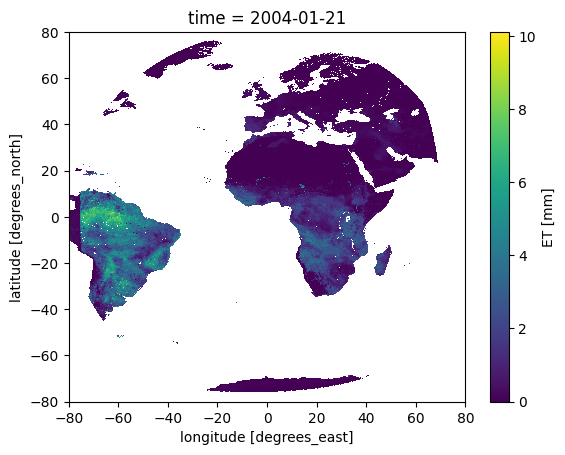

In [8]:
# Visualise a sample month
sample = xr.open_dataset(all_files[0])
sample['ET'].plot()

#### Open and concatenate the netcdf file

In [9]:
# # Assuming all your files have a common prefix or pattern
# ds = xr.open_mfdataset('*.nc', combine='by_coords')  # Opens all matching files

# # Calculate monthly means
# monthly_mean = ds.resample(time='1M').mean()



In [10]:
# # Save the result
# monthly_mean.to_netcdf('monthly_mean_et.nc')

In [11]:
# # Concatenate the all the netcdf files in batches
# combine_et = xr.open_mfdataset(all_files, combine = 'nested', concat_dim="time")
# combine_et

In [12]:
# Find the mean
monthly_scale_et = file.resample(time='MS').mean()
monthly_scale_et

<xarray.Dataset>
Dimensions:                 (lat: 3201, lon: 3201, time: 252)
Coordinates:
  * lat                     (lat) float32 80.0 79.95 79.9 ... -79.9 -79.95 -80.0
  * lon                     (lon) float32 -80.0 -79.95 -79.9 ... 79.9 79.95 80.0
  * time                    (time) datetime64[ns] 2004-01-01 ... 2024-12-01
Data variables:
    ET                      (time, lat, lon) float64 dask.array<chunksize=(1, 3201, 3201), meta=np.ndarray>
    max_nslots_missing      (time, lat, lon) float64 dask.array<chunksize=(1, 3201, 3201), meta=np.ndarray>
    missing_values_percent  (time, lat, lon) float64 dask.array<chunksize=(1, 3201, 3201), meta=np.ndarray>
Attributes: (12/27)
    date_created:               2023-03-06T11:15:29Z
    algorithm_version:          2.0.1
    base_algorithm_version:     0.5.4
    processing_level:           04
    platform:                   MSG1
    sensor:                     SEVI
    ...                         ...
    westernmost_longitude:      80.0
    spatial_resolution:          0.05x 0.05
    geospatial_lat_units:       degrees_north
    geospatial_lon_units:       degrees_east
    Conventions:                CF-1.6
    netcdf_version_id:          netCDF4

In [13]:
monthly_scale_et.data_vars

Data variables:
    ET                      (time, lat, lon) float64 dask.array<chunksize=(1, 3201, 3201), meta=np.ndarray>
    max_nslots_missing      (time, lat, lon) float64 dask.array<chunksize=(1, 3201, 3201), meta=np.ndarray>
    missing_values_percent  (time, lat, lon) float64 dask.array<chunksize=(1, 3201, 3201), meta=np.ndarray>

In [14]:

gha_region = gpd.read_file(gha_region)
gha_region[:5]

,OBJECTID,COUNTRY,area,Shape_Leng,Shape_Area,land_under,geometry
0,1,Burundi,0.0,8.560371,2.193095,None,"POLYGON ((30.36003 -2.35343, 30.36209 -2.35250..."
1,2,Djibouti,0.0,7.874779,1.781569,None,"POLYGON ((42.66339 11.07150, 42.65628 11.07671..."
2,3,Eritrea,0.0,41.125347,10.077064,None,"MULTIPOLYGON (((43.14681 12.71384, 43.14167 12..."
3,4,Ethiopia,0.0,49.028874,92.986294,None,"POLYGON ((41.77824 11.54207, 41.77785 11.51077..."
4,5,Kenya,0.0,40.625985,47.319578,None,"MULTIPOLYGON (((39.40283 -4.65471, 39.40523 -4..."


In [15]:
gha_region.explore()

In [16]:
# Set spatial dimensions and CRS
data = monthly_scale_et.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
data = data.rio.write_crs("epsg:4326", inplace=True)

# Load the shapefile using geopandas
gdf = gha_region.to_crs(data.rio.crs)

# Extract geometries from the GeoDataFrame
geometries = gdf.geometry

# Clip the dataset using the geometries
gha_eta = data.rio.clip(geometries, gdf.crs)

In [17]:
gha_eta

<xarray.Dataset>
Dimensions:                 (lat: 697, lon: 592, time: 252)
Coordinates:
  * lat                     (lat) float32 23.1 23.05 23.0 ... -11.6 -11.65 -11.7
  * lon                     (lon) float32 21.85 21.9 21.95 ... 51.3 51.35 51.4
  * time                    (time) datetime64[ns] 2004-01-01 ... 2024-12-01
    crs                     int64 0
Data variables:
    ET                      (time, lat, lon) float64 dask.array<chunksize=(1, 697, 592), meta=np.ndarray>
    max_nslots_missing      (time, lat, lon) float64 dask.array<chunksize=(1, 697, 592), meta=np.ndarray>
    missing_values_percent  (time, lat, lon) float64 dask.array<chunksize=(1, 697, 592), meta=np.ndarray>
Attributes: (12/27)
    date_created:               2023-03-06T11:15:29Z
    algorithm_version:          2.0.1
    base_algorithm_version:     0.5.4
    processing_level:           04
    platform:                   MSG1
    sensor:                     SEVI
    ...                         ...
    westernmost_longitude:      80.0
    spatial_resolution:          0.05x 0.05
    geospatial_lat_units:       degrees_north
    geospatial_lon_units:       degrees_east
    Conventions:                CF-1.6
    netcdf_version_id:          netCDF4

In [18]:
# Remove grid attribute

# Create a copy or use a new dataset if needed
gha_eta_modified = gha_eta.copy()

for var_name in gha_eta_modified.data_vars:
    if 'grid_mapping' in gha_eta_modified[var_name].attrs:
        del gha_eta_modified[var_name].attrs['grid_mapping']

# Now gha_eta_modified is your dataset without grid_mapping attributes

In [19]:
gha_eta_modified.data_vars['ET']

<xarray.DataArray 'ET' (time: 252, lat: 697, lon: 592)>
dask.array<getitem, shape=(252, 697, 592), dtype=float64, chunksize=(2, 697, 592), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 23.1 23.05 23.0 22.95 ... -11.55 -11.6 -11.65 -11.7
  * lon      (lon) float32 21.85 21.9 21.95 22.0 22.05 ... 51.25 51.3 51.35 51.4
  * time     (time) datetime64[ns] 2004-01-01 2004-02-01 ... 2024-12-01
    crs      int64 0
Attributes:
    long_name:  ET
    units:      mm

In [20]:
# Save the clipped data to a new NetCDF file
gha_eta_modified.to_netcdf('gha_lsa_et.nc')

In [ ]:
# Save the clipped data to a new NetCDF file
gha_eta_modified.to_netcdf(data_dir + 'gha_lsa_et.nc')

In [ ]:
gha_et = xr.open_dataset("../../datasets/et/lsa_safgha_lsa_et.nc")
gha_et

In [ ]:
gha_et.ET.isel(time=0).plot()

#### Climatology - Calculate the anomalies

In [ ]:
# Calculate monthly climatology (mean for each month over the years)
et_climatology = gha_et.groupby("time.month").mean("time")

# Calculate anomalies
et_anomalies = gha_et.groupby("time.month") - et_climatology

# Calculate monthly standard deviation over the years
et_std_dev = gha_et.groupby("time.month").std("time")


In [ ]:
et_anomalies

In [ ]:
# TODO: Implement fitting marginal distribution to the data

# Subset data for a bounding box (e.g., Greater Horn of Africa)
region = et_anomalies['ET'].sel(lon=slice(33, 43), lat=slice(5, -5))

# Calculate mean precipitation over space or time within the region
region_mean_time = region.mean(dim=["lon", "lat"])
region_mean_time.plot.hist(bins=30)
plt.title("Regional Mean ET Over Time")
plt.ylabel("Precipitation (mm)")
plt.show()

In [ ]:
# Select a specific time point
specific_time = "2004-03-31"

# Extract spatial precipitation data
spatial_data = et_anomalies['ET'].isel(time=20)

# Flatten the data and plot histogram
spatial_data.plot.hist(bins=1)
plt.title(f"Marginal Distribution Over Space for {specific_time}")
plt.xlabel("Precipitation (mm)")
plt.ylabel("Frequency")
plt.show()


#### Standadize the anomalies

In [ ]:
# Standardize anomalies (optional)
et_standardized = et_anomalies / et_std_dev

In [ ]:
# TODO: Implement fitting marginal distribution to the data

# Select a specific location
lon, lat = 37.0, -1.0  # Example coordinates

# Extract time series for the location
time_series = et_standardized['ET'].sel(lon=lon, lat=lat, method="nearest")

# Plot histogram (marginal distribution over time)
time_series.plot.hist(bins=30)
plt.title(f"Marginal Distribution Over Time at Lon: {lon}, Lat: {lat}")
plt.xlabel("ET (mm)")
plt.ylabel("Frequency")
plt.show()



In [ ]:
et_anomalies['ET'].isel(time=0).plot()

In [ ]:
# TODO: Transform data to uniform margins